In [ ]:
import warnings
warnings.filterwarnings('ignore')

# MInMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
import numpy as np
toy_data = np.array([ [3],[5],[2],[8],[9], [12]])*1000
toy_data

array([[ 3000],
       [ 5000],
       [ 2000],
       [ 8000],
       [ 9000],
       [12000]])

In [ ]:
scaler = MinMaxScaler()
scaler.fit(toy_data) # prepare the function, find max and min
scaler.transform(toy_data)

array([[0.1],
       [0.3],
       [0. ],
       [0.6],
       [0.7],
       [1. ]])

## Dataset

In [ ]:
from sklearn.datasets import load_breast_cancer
X_bc, y_bc = load_breast_cancer(return_X_y=True)

In [ ]:
X_bc.shape, y_bc.shape

((569, 30), (569,))

In [ ]:
from sklearn.model_selection import train_test_split
X_bc_train, X_bc_test, y_bc_train, y_bc_test = train_test_split(X_bc, y_bc, random_state=0)
X_bc_train.shape, X_bc_test.shape

((426, 30), (143, 30))

## Scaling

In [ ]:
# find min and max of only training set
scaler.fit(X_bc_train) # which one: X_bctrain, X_bctest, X

MinMaxScaler()

In [ ]:
X_bc_train_scaled = scaler.transform(X_bc_train)
X_bc_test_scaled  = scaler.transform(X_bc_test)

## knn

In [ ]:
# without scaling
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_bc_train, y_bc_train)
print(f'Training Score: {round(knn.score(X_bc_train, y_bc_train),2)}')
print(f'Test     Score: {round(knn.score(X_bc_test , y_bc_test),2)}')

Training Score: 0.94
Test     Score: 0.94


In [ ]:
# with scaling
knn.fit(X_bc_train_scaled, y_bc_train)
print(f'Training Score: {round(knn.score(X_bc_train_scaled, y_bc_train),2)}')
print(f'Test     Score: {round(knn.score(X_bc_test_scaled , y_bc_test),2)}')

Training Score: 0.98
Test     Score: 0.96


# Unsupervised Learning

In [ ]:
from sklearn.datasets import load_iris
X_iris, y_iris = load_iris(return_X_y=True)
X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(X_iris, y_iris, random_state=0)
X_iris_train.shape, X_iris_test.shape

((112, 4), (38, 4))

In [ ]:
f_names = load_iris().feature_names
f_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

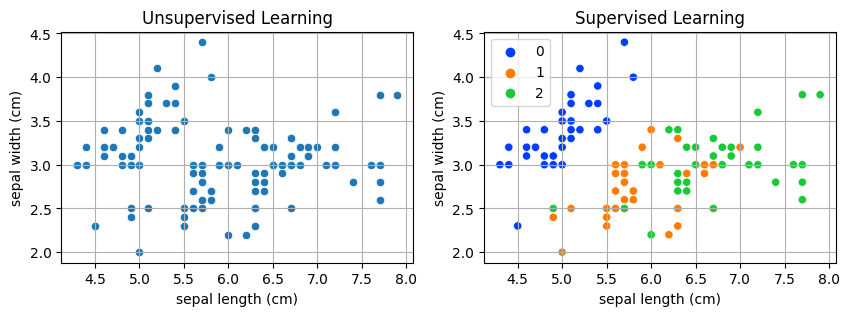

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
plt.title('Unsupervised Learning')
sns.scatterplot( x=X_iris_train[:,0], y=X_iris_train[:,1]  )
plt.xlabel(f_names[0])
plt.ylabel(f_names[1])
plt.grid()

plt.subplot(1,2,2)
plt.title('Supervised Learning')
sns.scatterplot( x=X_iris_train[:,0], y=X_iris_train[:,1], hue=y_irisc_train, palette='bright')
plt.xlabel(f_names[0])
plt.ylabel(f_names[1])
plt.grid()

# kmeans

In [ ]:
# scale input data
scaler.fit(X_iris_train)
X_iris_train_scaled = scaler.transform(X_iris_train)
X_iris_test_scaled  = scaler.transform(X_iris_test)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_iris_train_scaled[:,:2])

KMeans(n_clusters=3)

In [ ]:
kmeans.labels_

array([0, 0, 2, 1, 2, 1, 1, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2,
       1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 1, 1, 2, 1, 0, 0, 1, 0, 2, 0,
       1, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 1, 0, 2, 1, 1, 2, 1, 1, 1, 0, 2,
       2, 1, 1, 1, 0, 2, 1, 1, 2, 1, 2, 0, 2, 2, 1, 0, 1, 2, 1, 1, 2, 1,
       2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 2, 0, 1, 2, 0, 0, 0, 1, 1, 1, 2, 0,
       2, 1], dtype=int32)

In [ ]:
kmeans.cluster_centers_

array([[0.3963964 , 0.26463964],
       [0.20495495, 0.59121622],
       [0.71345029, 0.45833333]])

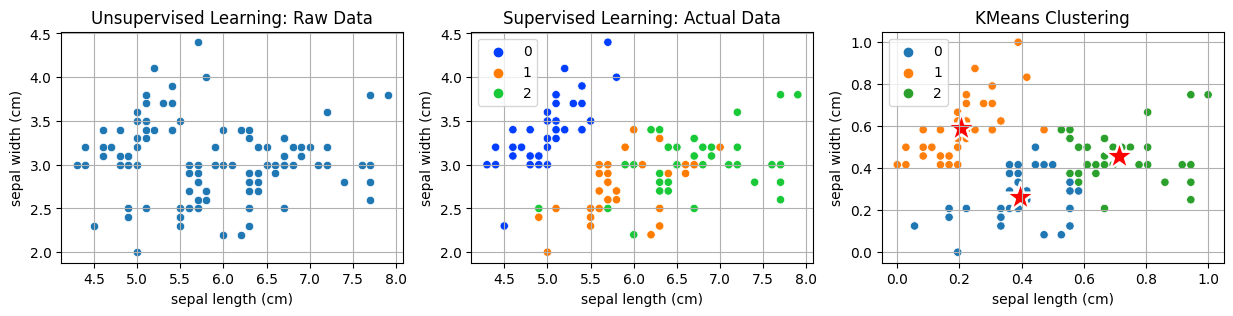

In [ ]:
plt.figure(figsize=(15,3))

plt.subplot(1,3,1)
plt.title('Unsupervised Learning: Raw Data')
sns.scatterplot( x=X_iris_train[:,0], y=X_iris_train[:,1]  )
plt.xlabel(f_names[0])
plt.ylabel(f_names[1])
plt.grid()

plt.subplot(1,3,2)
plt.title('Supervised Learning: Actual Data')
sns.scatterplot( x=X_iris_train[:,0], y=X_iris_train[:,1], hue=y_irisc_train, palette='bright')
plt.xlabel(f_names[0])
plt.ylabel(f_names[1])
plt.grid()

plt.subplot(1,3,3)
plt.title('KMeans Clustering')
sns.scatterplot( x=X_iris_train_scaled[:,0], y=X_iris_train_scaled[:,1], hue=kmeans.labels_, palette='tab10')
sns.scatterplot( x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1], marker='*', c='r', s=500)
plt.xlabel(f_names[0])
plt.ylabel(f_names[1])
plt.grid()

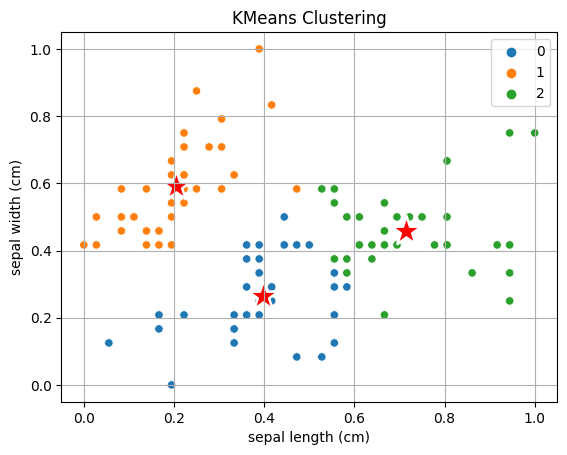

In [ ]:
plt.title('KMeans Clustering')
sns.scatterplot( x=X_iris_train_scaled[:,0], y=X_iris_train_scaled[:,1], hue=kmeans.labels_, palette='tab10')
sns.scatterplot( x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1], marker='*', c='r', s=500)
plt.xlabel(f_names[0])
plt.ylabel(f_names[1])
plt.grid()

# TSNE

In [ ]:
from sklearn.datasets import load_digits
X_digits, y_digits = load_digits(return_X_y=True)
X_digits_train, X_digits_test, y_digits_train, y_digits_test = train_test_split(X_digits, y_digits, random_state=0)
X_digits_train.shape, X_digits_test.shape

((1347, 64), (450, 64))

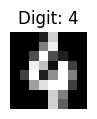

In [ ]:
N = 100
plt.figure(figsize=(1,1))
plt.title(f'Digit: {y_digits[N]}')
plt.imshow(load_digits().images[N], 'gray')
plt.axis('off');

In [ ]:
X_digits_train, X_digits_test, y_digits_train, y_digits_test = train_test_split(X_digits, y_digits, random_state=0)
X_digits_train.shape, X_digits_test.shape

((1347, 64), (450, 64))

In [ ]:
X_digits_train_scaled = X_digits_train/255
X_digits_test_scaled  = X_digits_test/255

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)

In [ ]:
X_train_tsne = tsne.fit_transform(X_digits_train_scaled)

In [ ]:
X_train_tsne.shape

(1347, 2)

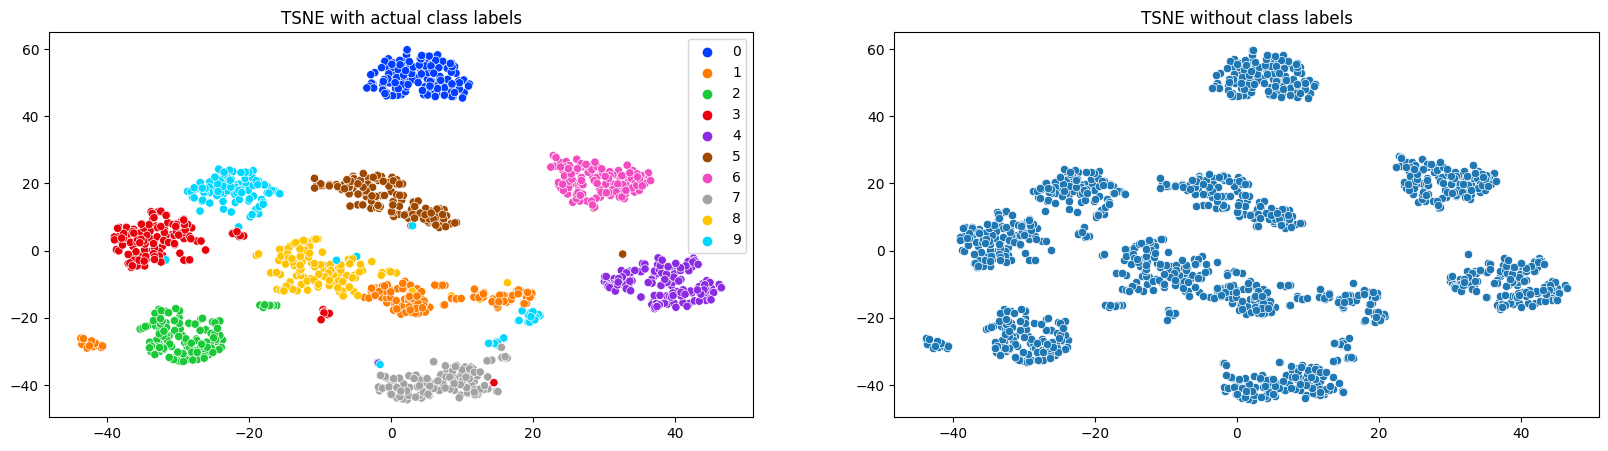

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.title('TSNE with actual class labels')
sns.scatterplot(x=X_train_tsne[:,0], y=X_train_tsne[:,1], hue=y_digits_train, palette='bright');

plt.subplot(1,2,2)
plt.title('TSNE without class labels')
sns.scatterplot(x=X_train_tsne[:,0], y=X_train_tsne[:,1]);

In [ ]:
tsne = TSNE(n_components=3)

In [ ]:
X_train_tsne = tsne.fit_transform(X_digits_train_scaled)

In [ ]:
X_train_tsne.shape

(1347, 3)

In [ ]:
import plotly.express as px
px.scatter_3d(x=X_train_tsne[:,0], y=X_train_tsne[:,1], z=X_train_tsne[:,2] )

In [ ]:
px.scatter_3d(x=X_train_tsne[:,0], y=X_train_tsne[:,1], z=X_train_tsne[:,2] , color=y_digits_train)

In [ ]:
tsne = TSNE(n_components=2)
X_iris_train_tsne = tsne.fit_transform(X_iris_train_scaled)

In [ ]:
X_iris_train_tsne.shape

(112, 2)

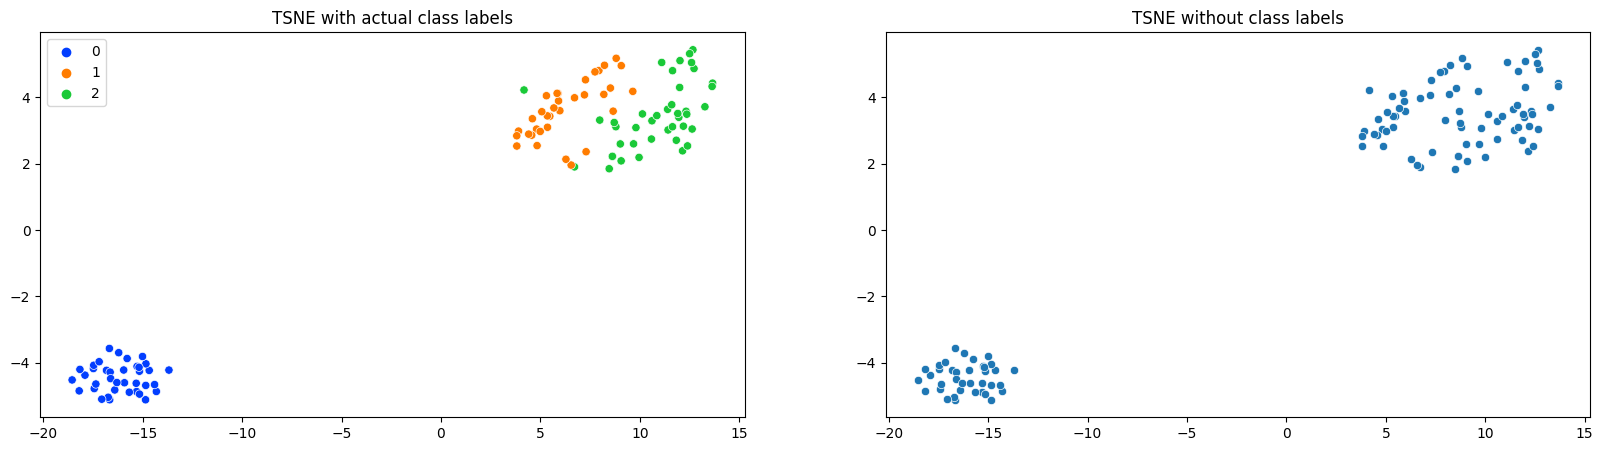

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.title('TSNE with actual class labels')
sns.scatterplot(x=X_iris_train_tsne[:,0], y=X_iris_train_tsne[:,1], hue=y_iris_train, palette='bright');

plt.subplot(1,2,2)
plt.title('TSNE without class labels')
sns.scatterplot(x=X_iris_train_tsne[:,0], y=X_iris_train_tsne[:,1]);

# PCA
- principal component analysis

In [ ]:
X_bc_train_scaled.shape

(426, 30)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(X_bc_train)

PCA(n_components=10)

In [ ]:
np.round(pca.explained_variance_ratio_,3)

array([0.981, 0.017, 0.002, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   ])

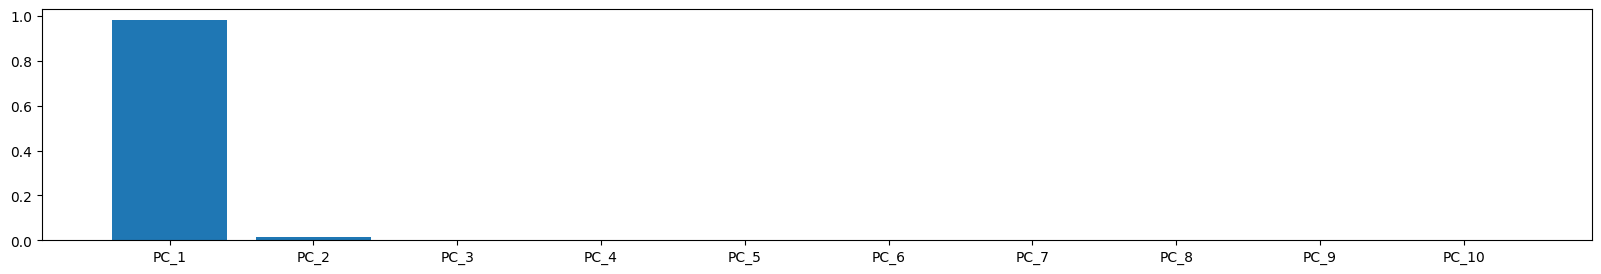

In [ ]:
plt.figure(figsize=(20,3))
plt.bar( [f'PC_{i}' for i in range(1,11)], pca.explained_variance_ratio_  );

In [ ]:
pca.components_.shape

(10, 30)

In [ ]:
pca.components_[0]

array([ 4.98547746e-03,  1.99455167e-03,  3.43122336e-02,  5.14385808e-01,
        4.00965777e-06,  3.79097051e-05,  7.73698737e-05,  4.63054246e-05,
        6.15802752e-06, -2.71833033e-06,  3.14615659e-04, -8.46798521e-05,
        2.22418882e-03,  5.71496973e-02, -7.60287599e-07,  4.52933947e-06,
        6.21840870e-06,  2.70919043e-06, -1.56015202e-06, -1.09416531e-07,
        7.04284959e-03,  2.83552468e-03,  4.86536162e-02,  8.53525087e-01,
        6.20060966e-06,  9.44912893e-05,  1.52246549e-04,  7.01876701e-05,
        1.60890351e-05,  1.25442781e-06])

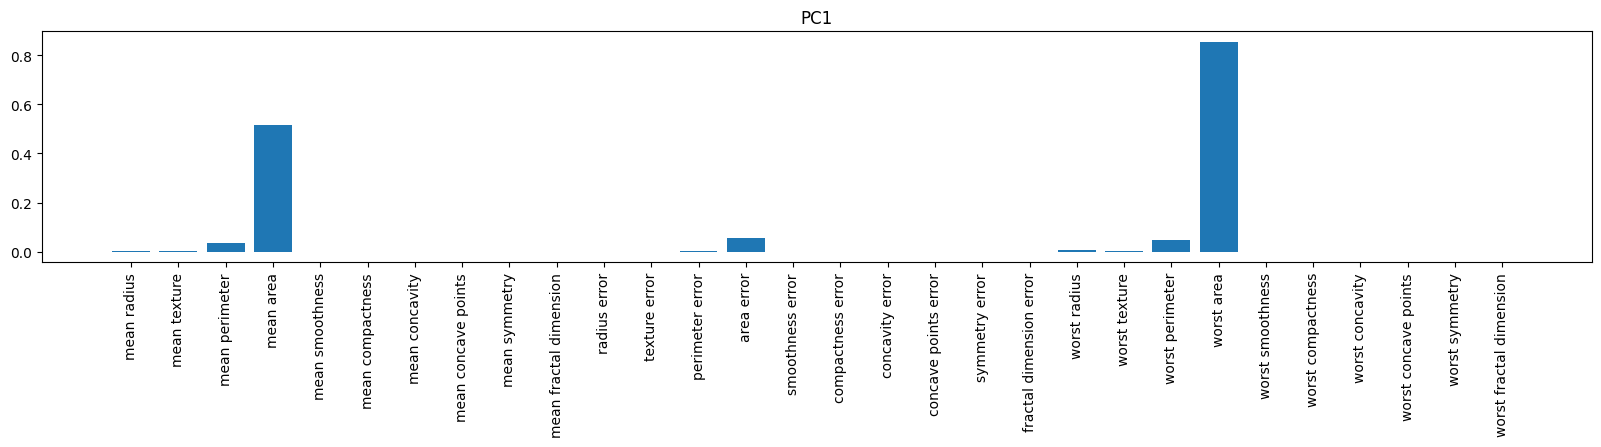

In [ ]:
plt.figure(figsize=(20,3))
plt.title('PC1')
plt.bar( load_breast_cancer().feature_names,  pca.components_[0] )
plt.xticks(rotation=90);

In [ ]:
pca = PCA(n_components=3)
X_bc_train_2 = pca.fit_transform(X_bc_train)
X_bc_test_2  = pca.transform(X_bc_test)

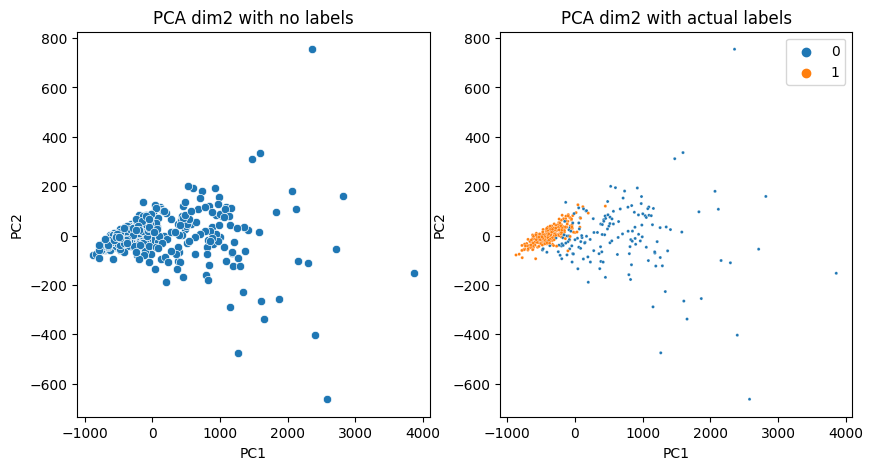

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('PCA dim2 with no labels')
sns.scatterplot(x= X_bc_train_2[:,0], y= X_bc_train_2[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2');

plt.subplot(1,2,2)
plt.title('PCA dim2 with actual labels')
sns.scatterplot(x= X_bc_train_2[:,0], y= X_bc_train_2[:,1], hue=y_bc_train, s=5)
plt.xlabel('PC1')
plt.ylabel('PC2');

In [ ]:
px.scatter_3d(x=X_bc_train_2[:,0], y=X_bc_train_2[:,1], z=X_bc_train_2[:,2] , color=y_bc_train)

# Hybrid Model: Scaling + PCA + knn

In [ ]:
# data and scaling
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_bc, y_bc = load_breast_cancer(return_X_y=True)

X_bc_train, X_bc_test, y_bc_train, y_bc_test = train_test_split(X_bc, y_bc, random_state=0)

scaler = MinMaxScaler()
X_bc_train_scaled = scaler.fit_transform(X_bc_train)
X_bc_test_scaled  = scaler.transform(X_bc_test)

In [ ]:
# pca
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_bc_train_pca = pca.fit_transform(X_bc_train_scaled)
X_bc_test_pca  = pca.transform(X_bc_test_scaled)

In [ ]:
# knn without scaling and without pca
# knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_bc_train, y_bc_train)
print(f'Training Score: {round(knn.score(X_bc_train, y_bc_train),2)}')
print(f'Test     Score: {round(knn.score(X_bc_test , y_bc_test),2)}')

Training Score: 0.94
Test     Score: 0.94


In [ ]:
# knn with scaling and without pca
# scale + knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_bc_train_scaled, y_bc_train)
print(f'Training Score: {round(knn.score(X_bc_train_scaled, y_bc_train),2)}')
print(f'Test     Score: {round(knn.score(X_bc_test_scaled , y_bc_test),2)}')

Training Score: 0.98
Test     Score: 0.96


In [ ]:
# knn with scaling and pca
# scale + pca + knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_bc_train_pca, y_bc_train)
print(f'Training Score: {round(knn.score(X_bc_train_pca, y_bc_train),2)}')
print(f'Test     Score: {round(knn.score(X_bc_test_pca , y_bc_test),2)}')

Training Score: 0.96
Test     Score: 0.92


In [ ]:
# knn with scaling and pca and scaling
# scale + pca + scale +knn
from sklearn.neighbors import KNeighborsClassifier

X_bc_train_pca_scaled = scaler.fit_transform(X_bc_train_pca)
X_bc_test_pca_scaled  = scaler.transform(X_bc_test_pca)

knn = KNeighborsClassifier()
knn.fit(X_bc_train_pca_scaled, y_bc_train)
print(f'Training Score: {round(knn.score(X_bc_train_pca_scaled, y_bc_train),2)}')
print(f'Test     Score: {round(knn.score(X_bc_test_pca_scaled , y_bc_test),2)}')

Training Score: 0.96
Test     Score: 0.93
